In [1]:
%matplotlib inline
import numpy as np
import math
import random
import pyJHTDB
import matplotlib.pyplot as plt
import time as tt

N = 3
T = pyJHTDB.dbinfo.channel5200['time'][-1]
time = np.random.random()*T

spatialInterp  = 6  # 6 point Lagrange
temporalInterp = 0  # no time interpolation
FD4Lag4        = 44 # 4 point Lagrange interp for derivatives

# mhdc has starttime .364 and endtime .376
startTime = time
endTime = startTime + 0.012
lag_dt = 0.0004

# Select points in the database to query
lpoints = []
for i in range(0,N):
    lpoints.append([random.uniform(0, 8*3.14),random.uniform(-1, 1),random.uniform(0, 3*3.14)])

# 2D array with single precision values
points = np.array(lpoints,dtype='float32')

In [2]:
# load shared library
lTDB = pyJHTDB.libJHTDB()
#initialize webservices
lTDB.initialize()

#Add token
auth_token  = "edu.jhu.pha.turbulence.testing-201311"  #Replace with your own token here
lTDB.add_token(auth_token)

print('Coordinates of {0} points where variables are requested:'.format(N))
for p in range(N):
    print('{0}: {1}'.format(p, points[p]))
print('Data is requested at time {0}'.format(time))

/Users/zzwz02/Desktop/pyJHTDB-20190211/pyJHTDB
Coordinates of 3 points where variables are requested:
0: [14.857052   -0.14923847  0.5415602 ]
1: [13.003702   0.3073738  8.507838 ]
2: [13.256288   0.7111343  0.7171838]
Data is requested at time 4.796185476509021


In [3]:
print('Requesting velocity at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocity')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity at 3 points...
0: [ 1.1767747   0.00623404 -0.00590923]
1: [ 1.0896943e+00 -4.7651608e-02 -3.7941182e-04]
2: [ 0.8205444  -0.04427328  0.09411597]


In [4]:
print('Requesting pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting pressure at 3 points...
0: [0.00070689]
1: [0.00191659]
2: [-0.00175657]


In [5]:
print('Requesting velocity and pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocityAndPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity and pressure at 3 points...
0: [ 1.1767747e+00  6.2340414e-03 -5.9092329e-03  7.0689165e-04]
1: [ 1.0896943e+00 -4.7651608e-02 -3.7941182e-04  1.9165940e-03]
2: [ 0.8205444  -0.04427328  0.09411597 -0.00175657]


In [6]:
print('Requesting velocity gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp,data_set ='channel',
        getFunction = 'getVelocityGradient')
for p in range(N):
    print('{0}: '.format(p) +
          'duxdx = {0:+e}, duxdy = {1:+e}, duxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2]) +
          'duydx = {0:+e}, duydy = {1:+e}, duydz = {2:+e}\n   '.format(result[p][3], result[p][4], result[p][5]) +
          'duzdx = {0:+e}, duzdy = {1:+e}, duzdz = {2:+e}'.format(result[p][6], result[p][7], result[p][8]))

Requesting velocity gradient at 3 points...
0: duxdx = -8.551628e-03, duxdy = -4.175488e-02, duxdz = -2.011644e-01
   duydx = -8.051684e-02, duydy = +9.135322e-02, duydz = +2.051166e-01
   duzdx = -7.592034e-02, duzdy = +1.365963e-01, duzdz = -8.345264e-02
1: duxdx = -1.665912e-01, duxdy = -5.196815e-01, duxdz = +4.546161e-01
   duydx = +8.496323e-01, duydy = +2.062311e-02, duydz = -1.724138e-01
   duzdx = +2.961786e-02, duzdy = -8.958030e-02, duzdz = +1.565257e-01
2: duxdx = +1.769528e+00, duxdy = -4.993045e-01, duxdz = -1.180120e+00
   duydx = +9.484767e-01, duydy = -1.298538e-01, duydz = +1.053616e+00
   duzdx = +6.430134e-01, duzdy = +5.631069e-01, duzdz = -1.644271e+00


In [7]:
print('Requesting velocity hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',sinterp = FD4Lag4, tinterp = temporalInterp,
                      getFunction = 'getVelocityHessian')

for p in range(N):
        print('{0}: '.format(p) +
              'd2uxdxdx = {0:+e}, d2uxdxdy = {1:+e}, d2uxdxdz = {2:+e}\n   '.format(result[p][ 0], result[p][ 1], result[p][ 2])
            + 'd2uxdydy = {0:+e}, d2uxdydz = {1:+e}, d2uxdzdz = {2:+e}\n   '.format(result[p][ 3], result[p][ 4], result[p][ 5])
            + 'd2uydxdx = {0:+e}, d2uydxdy = {1:+e}, d2uydxdz = {2:+e}\n   '.format(result[p][ 6], result[p][ 7], result[p][ 8])
            + 'd2uydydy = {0:+e}, d2uydydz = {1:+e}, d2uydzdz = {2:+e}\n   '.format(result[p][ 9], result[p][10], result[p][11])
            + 'd2uzdxdx = {0:+e}, d2uzdxdy = {1:+e}, d2uzdxdz = {2:+e}\n   '.format(result[p][12], result[p][13], result[p][14])
            + 'd2uzdydy = {0:+e}, d2uzdydz = {1:+e}, d2uzdzdz = {2:+e}'.format(result[p][15], result[p][16], result[p][17]))
        

Requesting velocity hessian at 3 points...
0: d2uxdxdx = +7.841374e-01, d2uxdxdy = -8.848171e-01, d2uxdxdz = +2.034633e+00
   d2uxdydy = -5.932120e+00, d2uxdydz = +5.767498e+00, d2uxdzdz = -1.198799e+00
   d2uydxdx = +4.162607e-01, d2uydxdy = -1.901135e+00, d2uydxdz = +2.255823e+00
   d2uydydy = +2.195820e+00, d2uydydz = -3.307690e+00, d2uydzdz = +9.282038e+00
   d2uzdxdx = +2.193876e+00, d2uzdxdy = +5.912984e-01, d2uzdxdz = +1.361990e+00
   d2uzdydy = +1.501977e+00, d2uzdydz = -1.460925e+00, d2uzdzdz = +1.233628e+00
1: d2uxdxdx = -2.359847e+01, d2uxdxdy = +1.434866e+01, d2uxdxdz = -1.122309e+01
   d2uxdydy = -3.825818e+01, d2uxdydz = +7.282127e+00, d2uxdzdz = +1.631855e+01
   d2uydxdx = -6.803267e+01, d2uydxdy = +2.087324e+01, d2uydxdz = +2.728419e+01
   d2uydydy = -1.992713e+01, d2uydydz = +4.348193e+00, d2uydzdz = -2.585017e+01
   d2uzdxdx = +3.398796e+01, d2uzdxdy = -1.750069e+01, d2uzdxdz = +1.640919e-01
   d2uzdydy = +2.501398e+01, d2uzdydz = +2.849306e+00, d2uzdzdz = +7.574605e+

In [8]:
print('Requesting velocity laplacian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getVelocityLaplacian')
for p in range(N):
    print('{0}: '.format(p) +
          'grad2ux = {0:+e}, grad2uy = {1:+e}, grad2uz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting velocity laplacian at 3 points...
0: grad2ux = -6.346781e+00, grad2uy = +1.189412e+01, grad2uz = +4.929481e+00, 
1: grad2ux = -4.553810e+01, grad2uy = -1.138100e+02, grad2uz = +6.657655e+01, 
2: grad2ux = +1.874654e+02, grad2uy = -7.087257e+01, grad2uz = -3.383289e+02, 


In [9]:
print('Requesting pressure gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureGradient')
for p in range(N):
    print('{0}: '.format(p)
        + 'dpdx = {0:+e}, dpdy = {1:+e}, dpdz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting pressure gradient at 3 points...
0: dpdx = -2.426038e-04, dpdy = -2.130720e-04, dpdz = +2.879267e-03, 
1: dpdx = +1.709319e-02, dpdy = -1.164042e-02, dpdz = -1.857769e-03, 
2: dpdx = +1.229567e-01, dpdy = -3.736086e-03, dpdz = +9.343248e-02, 


In [10]:
print('Requesting pressure hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureHessian')
for p in range(N):
    print('{0}: '.format(p) +
          'd2pdxdx = {0:+e}, d2pdxdy = {1:+e}, d2pdxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2])
        + 'd2pdydy = {0:+e}, d2pdydz = {1:+e}, d2pdzdz = {2:+e}'.format(result[p][3], result[p][4], result[p][5]))

Requesting pressure hessian at 3 points...
0: d2pdxdx = -1.123173e-02, d2pdxdy = +5.002522e-02, d2pdxdz = +1.032991e-02
   d2pdydy = +3.725511e-03, d2pdydz = -1.046573e-02, d2pdzdz = -1.003489e-01
1: d2pdxdx = +1.589826e-01, d2pdxdy = +2.320983e-01, d2pdxdz = +3.779098e-02
   d2pdydy = +2.564880e-01, d2pdydz = -3.515992e-01, d2pdzdz = +4.138240e-01
2: d2pdxdx = -8.285873e+00, d2pdxdy = +2.961949e+00, d2pdxdz = -8.421596e+00
   d2pdydy = +1.006086e+00, d2pdydz = +1.168605e+00, d2pdzdz = +2.992619e+00


In [11]:
result = lTDB.getThreshold(
            data_set = 'channel',
            field = 'vorticity',
            time = 0,
            threshold = 0.0,
            cx = 0, cy = 0, cz = 0,
            nx = 4, ny = 4, nz = 4,
            sinterp = 40,
            tinterp = 0)
for p in range(N):
    print('{0}: '.format(p)
        + 'i_x = {0}, i_y = {1}, i_z = {2}, value = {3} '.format(result[p][0], result[p][1], result[p][2],result[p][3]))

0: i_x = 3, i_y = 3, i_z = 1, value = 65.96614837646484 
1: i_x = 3, i_y = 2, i_z = 1, value = 65.83401489257812 
2: i_x = 3, i_y = 1, i_z = 1, value = 65.75108337402344 


In [12]:
start = tt.time()
result = lTDB.getCutout(
    data_set = 'channel',
    field='u',
    time=int(0),
    start = np.array([0, 0, 0], dtype = np.int),
    size  = np.array([512, 512, 1], dtype = np.int),
    step  = np.array([1, 1, 1], dtype = np.int),
    filter_width = 1)
#print(result)
end = tt.time()
print(end - start)

4.974523067474365


(1, 512, 512, 3)


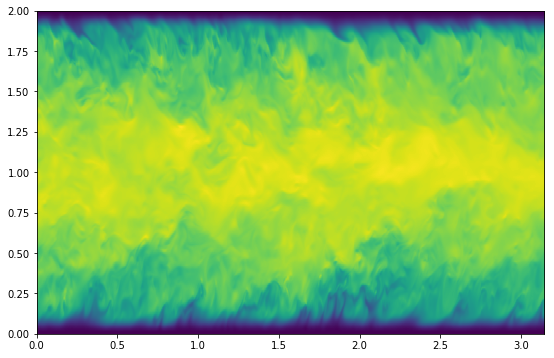

In [13]:
print(result.shape)
fig = plt.figure(figsize = (20, 40))
a = fig.add_subplot(121)
#a.set_axis_off()
a.imshow(result[0,:,:,0],
         extent = [0, 3.14, 0, 2],
         interpolation = 'none')

In [14]:
x, t = lTDB.getPosition(
    starttime = 0.1,
    endtime = 0.2,
    dt = 0.01,
    data_set = 'channel',
    point_coords = points[0:1,:],
    steps_to_keep = 10)
print(x)

starting integration loop, dataset is  channel
at time step 1 out of 10
got next position for time step 1
at time step 2 out of 10
got next position for time step 2
at time step 3 out of 10
got next position for time step 3
at time step 4 out of 10
got next position for time step 4
at time step 5 out of 10
got next position for time step 5
at time step 6 out of 10
got next position for time step 6
at time step 7 out of 10
got next position for time step 7
at time step 8 out of 10
got next position for time step 8
at time step 9 out of 10
got next position for time step 9
at time step 10 out of 10
got next position for time step 10
[[[14.857052   -0.14923847  0.5415602 ]]

 [[14.867815   -0.14941862  0.54155016]]

 [[14.878579   -0.14959897  0.54153913]]

 [[14.889346   -0.14977972  0.54152715]]

 [[14.900115   -0.14996086  0.5415142 ]]

 [[14.910887   -0.15014245  0.5415003 ]]

 [[14.921659   -0.1503245   0.5414853 ]]

 [[14.932436   -0.150507    0.54146934]]

 [[14.943215   -0.1506900

In [15]:
t1 = np.linspace(0, 4*3.14, 256)
t2 = np.linspace(-1, 1, 256)
x = np.zeros((t1.shape[0], t2.shape[0], 3), np.float32)
x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0

In [16]:
T = pyJHTDB.dbinfo.channel5200['time'][-1]
time = np.random.random()*T
u = lTDB.getData(
               time,
               x,
               data_set = 'channel5200',
               sinterp = 4,
               getFunction='getVelocity')

(256, 256, 3)


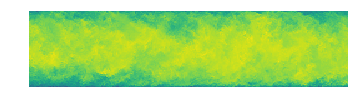

In [17]:
print(u.shape)
fig = plt.figure(figsize = (t1[-1] - t1[0], t2[-1] - t2[0]))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow(u[:,:,0],
         extent = [t1[0], t1[-1] - t1[0], t2[0], t2[-1] - t2[0]],
         interpolation = 'none')

In [18]:
lTDB.finalize()